<a href="https://colab.research.google.com/github/Mohammad-Shiblu/Pytorch_Tutorial/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (Preparing and loading)

Data can be almost anything in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representations
2. Build a model to learn patterns in that numerical representation.

In [ ]:
# create known parameter
weight = 0.7
bias = 0.3

# cerate data
start = 0
end = 1
step = 0.02
X =  torch.arange(start, end, step).unsqueeze(dim=1)
y =  weight * X + bias


### Splitting data into training and test sets

In [ ]:
# create a train/test split

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data= X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= None):
  """plot traing data, test data and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c ="g", s=4, label= "Test data")

  # Are there predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions" )

  # Show the legend
  plt.legend(prop={"size": 14})



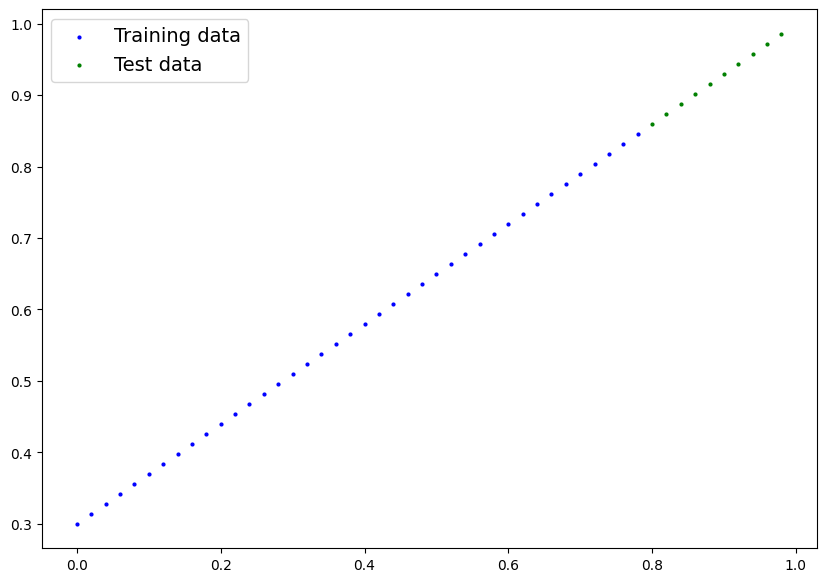

In [ ]:
plot_predictions()

## Build MOdel

In [ ]:
# create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- Pytorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear refression equation


### PyTorch model building essentials

* torch.nn - contains all of the buildings block for computational graphs (a neural betwork can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward, this method define what happen in forward computation


In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()
# check out the parameter
list((model_0.parameters()))

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction with using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model it through the forward() method

In [ ]:
# Make predictio with model
# its same as torch.no_grad(), however inference_mode is preffered
with torch.inference_mode(): # turns off the gradient tracking. we don't need to track it now
  y_preds = model_0(X_test)

y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

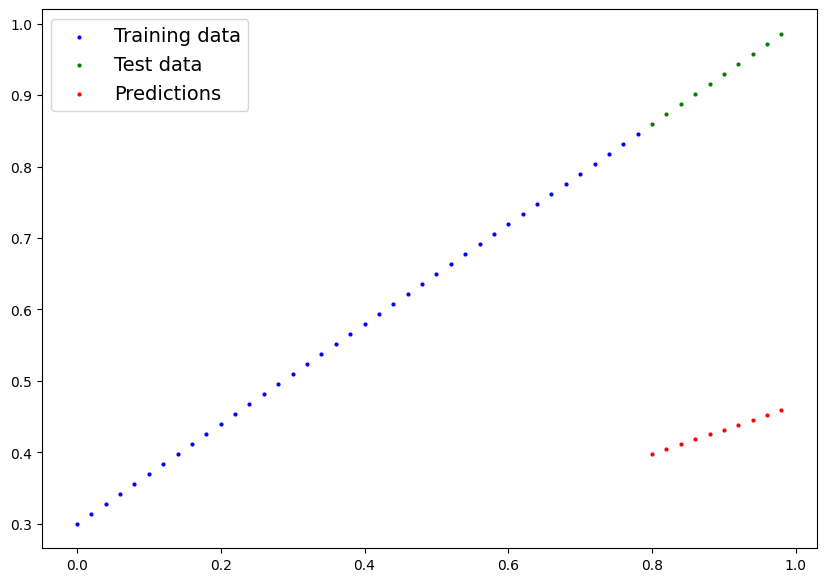

In [ ]:
plot_predictions(predictions = y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

or in other words from a poor representation of the data to a better representation of data

one way to measure how poor or how wrong your models predictions are is to use loss function

optimizer: Takes into account the loss function and adjust the Models parameters (weight and bias values)

And specifically for PyTorch we need:
* A training loop
* A testing loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss()

# set up the optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr = learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things need in a training loop:
0. Loop through the data
1. forward pass (this involves data moving through our models `forward ` functions) to make the predictions
2. calculate the loss (compare forward pass predictions to ground truth label.)
3. Optimizer the zero grad.
4. Loss Backward- move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss. (back propagation)
5. Optimizer step - use the optimizer to adjust our models parameter to try and improve the loss.
6.


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# An epoch is one loop through the data (this is a hyper parameter)
torch.manual_seed(42)

epochs = 200

# Track
epoch_count = []
loss_values = []
test_loss_values = []

### training
# 0. Lopp through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients


  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss:{loss}")
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameter
  loss.backward() # by default how the optimizer changes will accumulate through the loop.. we have to zero them above in step 3 for the next iteration of the loop

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()


  model_0.eval()  # turns off different setting in the model not needed for evaluation/ drop out and batch norms layer
  with torch.inference_mode(): # turns off gradient tracking & couple more things
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")
    # print out model state dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

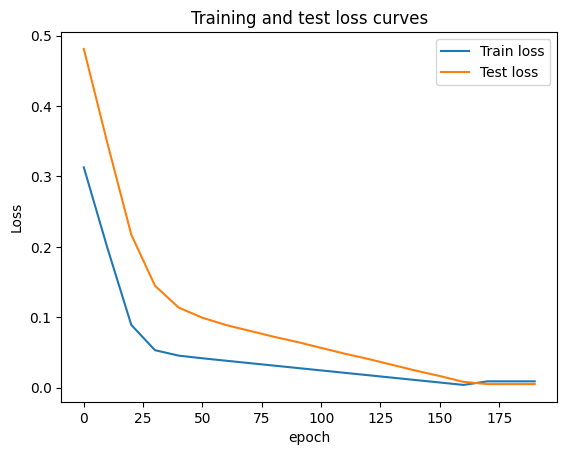

In [ ]:
import numpy as np

# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label ="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()


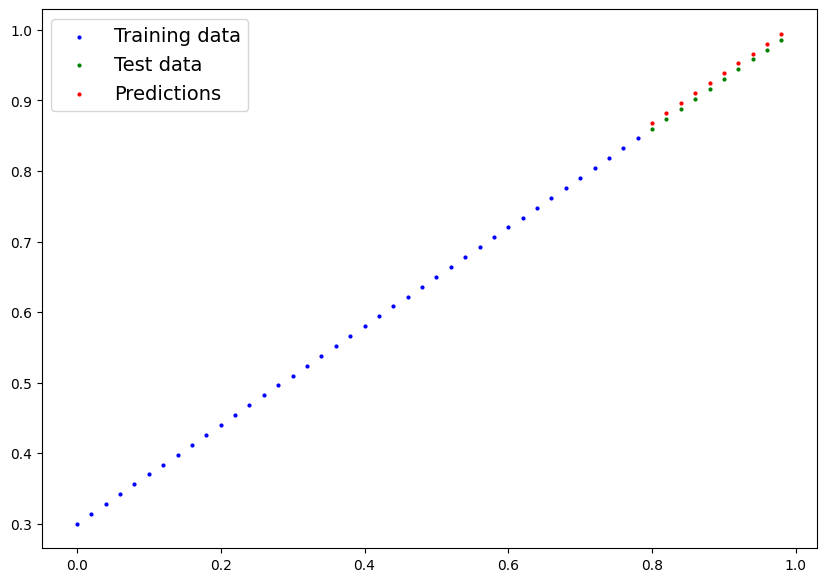

In [ ]:
plot_predictions(predictions= test_pred)

## Saving a model in pytorch

There are three main methods for saving adn loading models in Pytorch

1. `torch.save()` - allows to save a pytorch object in Pythons pickle format.
2. `torch.load()` - allows you load a saved Pytorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# saving outr Pytorch model
from pathlib import Path

 # 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents =True, exist_ok= True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"   # .pth or .pt common convention of model file
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model.state_dict()

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj =model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Aug  9 19:41 01_pytorch_workflow_model_0.pth


## Loading the a PyTorch model

Since we saved our models `state_dict()` rather the entire model, we'll create a new instance of our model class and load the `save_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have ti instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some prediction our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare loaded model preds with orginal model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

Lets go back through the steps above and see it all in one place.

In [ ]:
### Import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version

torch.__version__

'2.0.1+cu118'

## Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [ ]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Wed Aug  9 23:40:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## Data
# Create some data using linaer regression formula y = weight*x + bias

weight = 0.5
bias =0.2

# create range values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start, end , step).unsqueeze(dim =1) # without error will pop up
y = weight*X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [ ]:
# split data
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data= X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= None):
  """plot traing data, test data and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c ="g", s=4, label= "Test data")

  # Are there predictions
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions" )

  # Show the legend
  plt.legend(prop={"size": 14})




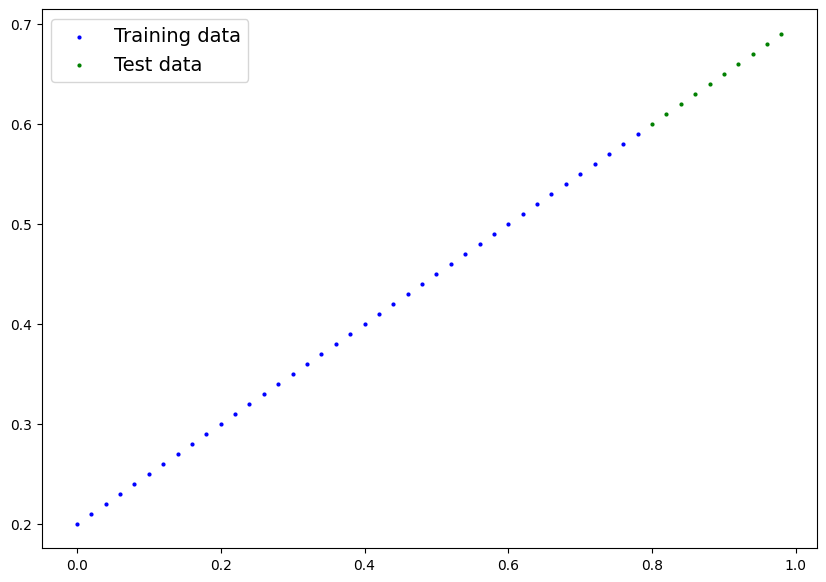

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch Linear model

In [ ]:
# create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__() # calling the constructor of parent class
    # Use nn.Linear() for creating the model parameters / also called: Linear transform, probing layer, full connected layer, dense layer
    self.linear_layer = nn.Linear(in_features =1,   # dimenstion of input and output
                                  out_features =1)
  def forward(self, x: torch.Tensor)-> torch.Tensor:
      return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()



(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Set up the loss function
loss_function = nn.L1Loss() # same as MAE

# SEt up the optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200
# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train() # model set to the training mode

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_function(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_function(test_pred, y_test)

  # print out whats happening

  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")



Epoch: 0 | Loss: 0.7216569185256958 | Test loss: 0.838505208492279 
Epoch: 10 | Loss: 0.6064471006393433 | Test loss: 0.7037953734397888 
Epoch: 20 | Loss: 0.49123722314834595 | Test loss: 0.5690855979919434 
Epoch: 30 | Loss: 0.37602734565734863 | Test loss: 0.4343757629394531 
Epoch: 40 | Loss: 0.2608174979686737 | Test loss: 0.2996659278869629 
Epoch: 50 | Loss: 0.145607590675354 | Test loss: 0.16495609283447266 
Epoch: 60 | Loss: 0.030397672206163406 | Test loss: 0.030246198177337646 
Epoch: 70 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 80 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 90 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 100 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 110 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 120 | Loss: 0.0072410800494253635 | Test loss: 0.001119637512601912 
Epoch: 130 | Loss: 0.0072410800494253635 | Test loss:

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5147]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2015], device='cuda:0'))])

In [ ]:
weight, bias

(0.5, 0.2)

## Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.6133],
        [0.6236],
        [0.6339],
        [0.6441],
        [0.6544],
        [0.6647],
        [0.6750],
        [0.6853],
        [0.6956],
        [0.7059]], device='cuda:0')

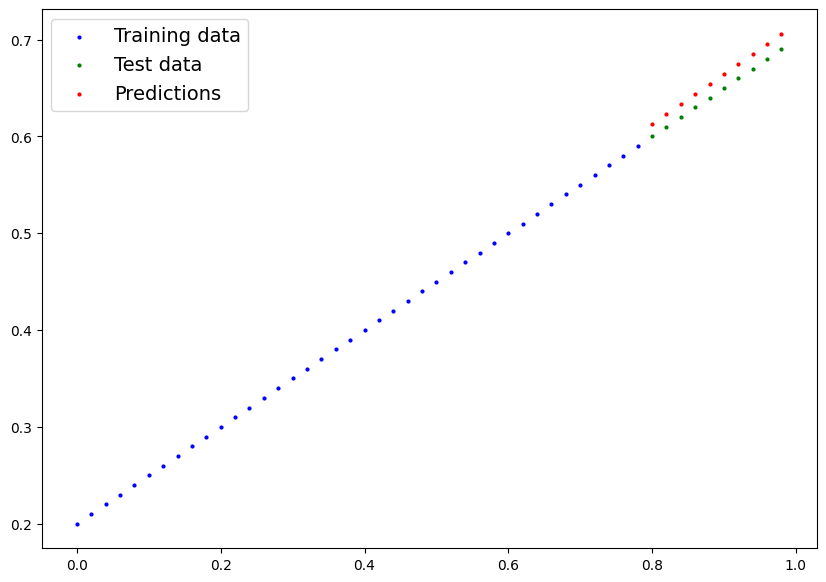

In [ ]:
# check out our model predictions visually

plot_predictions(predictions = y_preds.cpu())

### Saving and loading model

In [ ]:

from pathlib import Path
# create model directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok =True)

Model_name = "1_pytorch_workflow_model_1.pth"
model_save_path = model_path / Model_name

print(f"Saving model to: {model_save_path}")
torch.save(obj= model_1.state_dict(), f= model_save_path)


Saving model to: models/=1_pytorch_workflow_model_1.pth


In [ ]:
model_save_path

PosixPath('models/=1_pytorch_workflow_model_1.pth')

In [ ]:
# Load a model
loaded_model_1 = LinearRegressionModelV2()

# Load theb saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(model_save_path))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5147]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2015], device='cuda:0'))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')